<a href="https://colab.research.google.com/github/alejandraberbesi/Notebooks_ML/blob/main/3_KNN_y_SVM%2B_crossvalidation_%2B_grid_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report

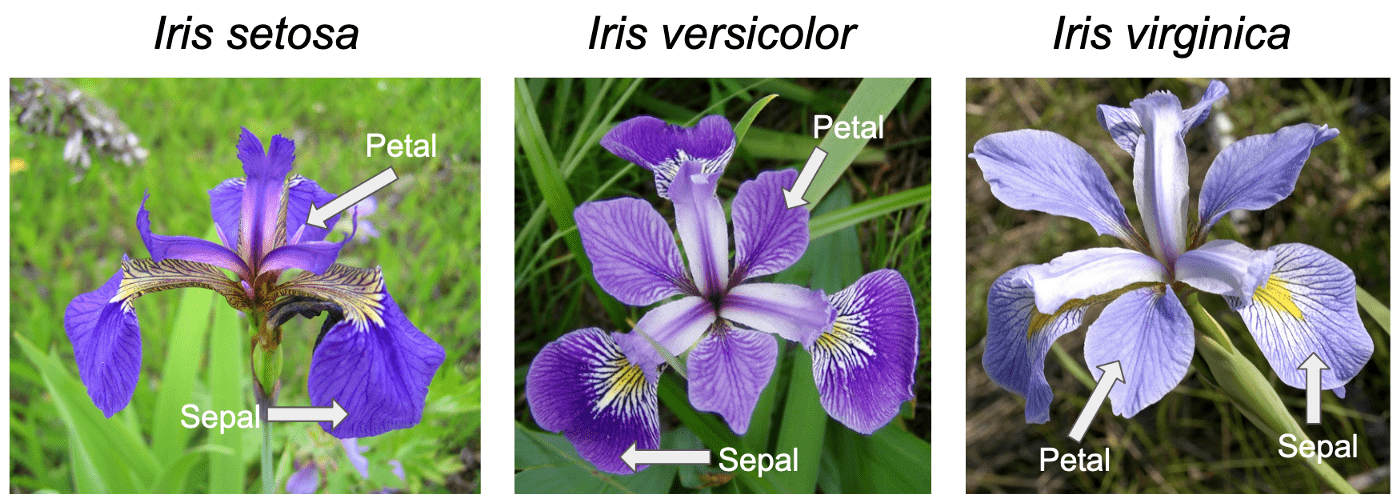

In [ ]:
iris = load_iris()

print(iris.target_names)
print(np.unique(iris.target))

['setosa' 'versicolor' 'virginica']
[0 1 2]


In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


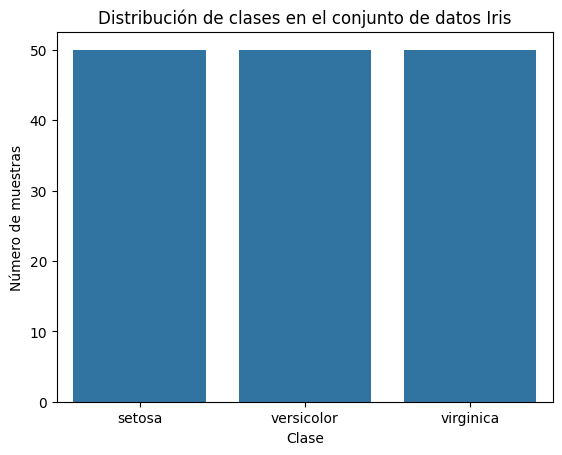

In [ ]:
# Graficar el conteo de clases
sns.countplot(x='Target', data=iris_df)
plt.xlabel('Clase')
plt.ylabel('Número de muestras')
plt.title('Distribución de clases en el conjunto de datos Iris')
plt.xticks(ticks=range(len(iris.target_names)), labels=iris.target_names)
plt.show()

In [ ]:
iris_df.iloc[:,0:4].describe()  #como todas las medidas estan en la misma unidad no va a haber necesidad de escalar

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


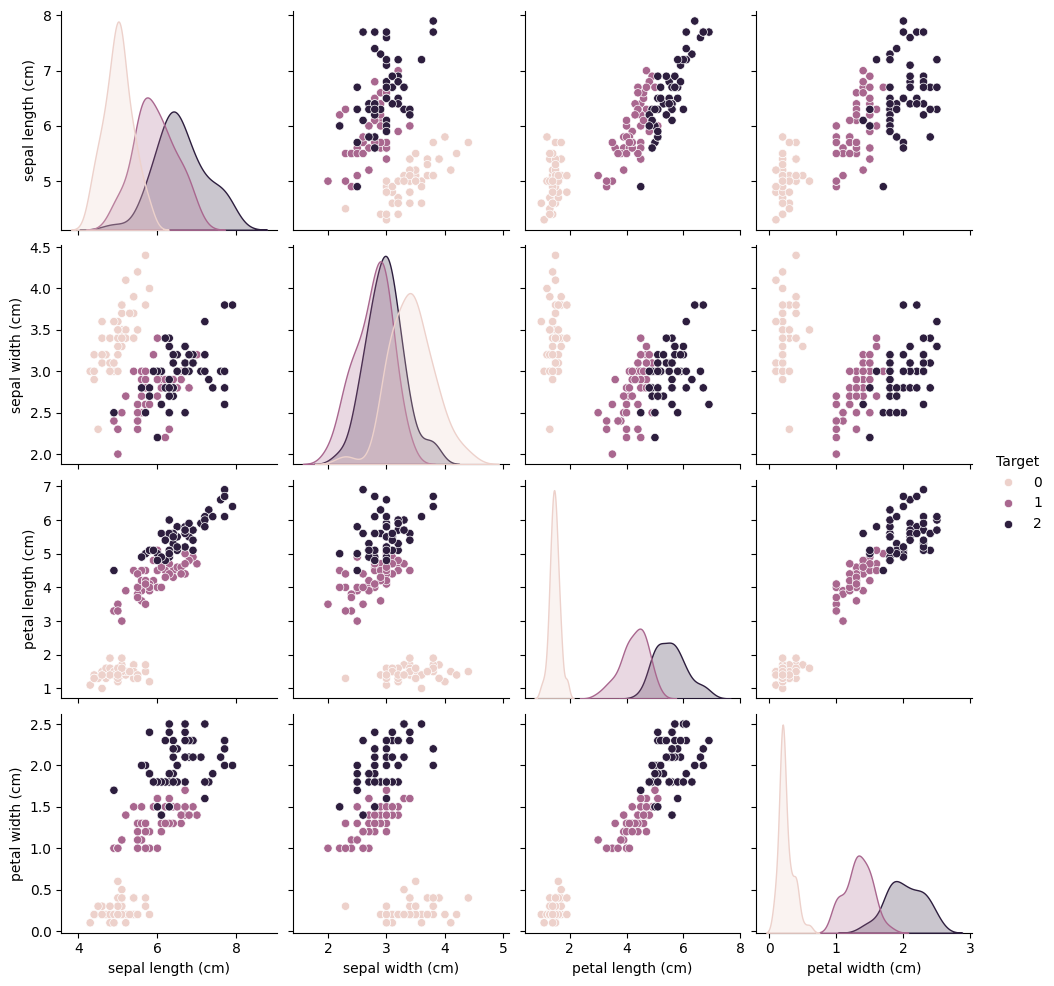

In [ ]:
sns.pairplot(iris_df, hue='Target')
plt.show()

In [ ]:
X=iris_df.iloc[:,0:4]
y=iris_df.iloc[:,4]

## Modelado: KNN (k-nearest neighboors)

En el caso de la clasificación, el objetivo es predecir la clase a la que pertenece una instancia de datos basada en las clases de las instancias vecinas más cercanas en el espacio de características.

El algoritmo funciona de la siguiente manera:
1. Para una nueva instancia de datos de entrada, el algoritmo calcula la distancia entre esta instancia y todas las demás instancias en el conjunto de datos de entrenamiento.
2. Luego, selecciona los k vecinos más cercanos (donde k es un número predefinido y generalmente impar) según la distancia calculada.
3. Finalmente, el algoritmo asigna la clase más común entre los k vecinos más cercanos a la nueva instancia de datos como su etiqueta de clasificación.

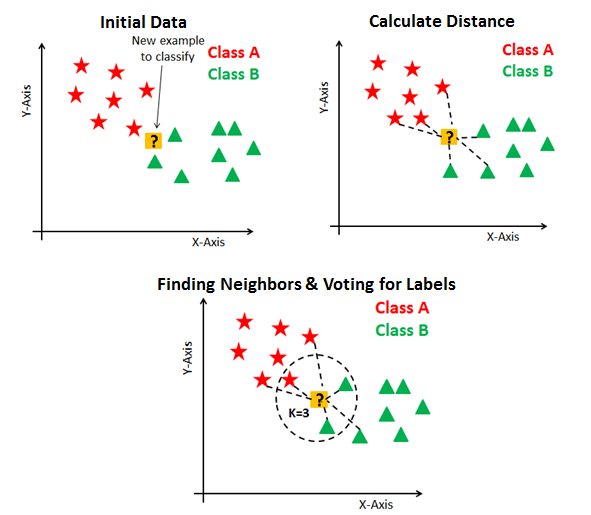

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### proceso para escoger mejor k

In [ ]:
{'n_neighbors': np.arange(1, 20)}

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19])}

In [ ]:
#para escoger K

#metodo que tambien se usa para ajuste de hiperparametros
param_grid = {'n_neighbors': np.arange(1, 20)}
knn_grid = GridSearchCV(KNeighborsClassifier(), #metodo de KNN
                        param_grid,
                        cv=5) #datos se dividirán en 5 pliegues (folds), lo explicare mas adelante
knn_grid.fit(X_train, y_train)
print("\nBest parameters:", knn_grid.best_params_)


Best parameters: {'n_neighbors': 3}


### cross-validation: proceso para verificar que resultados no son por division de dataset entre training y testing  ... puedes hacerlo con todos tus modelos

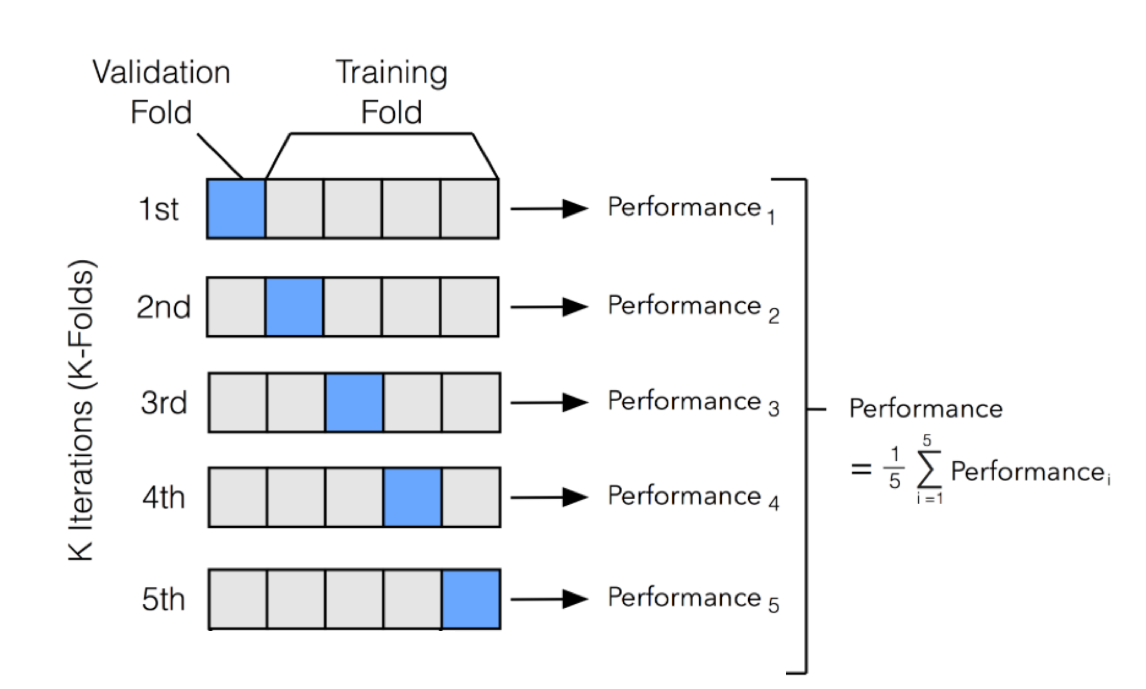

In [ ]:
from sklearn.model_selection import KFold

kf =KFold(n_splits=5,#numero de divisiones
          shuffle=True,
          random_state=42
          )

In [ ]:
#como se divide cada seccion

cnt = 1

for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 120, Test set:30
Fold:2, Train set: 120, Test set:30
Fold:3, Train set: 120, Test set:30
Fold:4, Train set: 120, Test set:30
Fold:5, Train set: 120, Test set:30


In [ ]:
# ver los indices de las filas seleccionadas

for i, (train_index, test_index) in enumerate(kf.split(X)):
  print(f" Fold {i}:")
  print(f" Train: index={train_index}")
  print(f" Test:  index={test_index}")

 Fold 0:
 Train: index=[  0   1   2   3   4   5   6   7   8  10  11  13  14  15  16  17  20  21
  22  23  24  25  27  28  32  33  34  35  37  38  39  40  41  42  43  44
  46  47  48  49  50  51  52  53  54  57  58  59  60  61  62  63  65  66
  67  70  71  72  74  75  77  79  80  81  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 105 106 107 109 111
 112 113 114 115 116 117 119 120 121 122 123 124 125 126 129 130 133 134
 135 136 137 138 139 140 142 144 146 147 148 149]
 Test:  index=[  9  12  18  19  26  29  30  31  36  45  55  56  64  68  69  73  76  78
  82 104 108 110 118 127 128 131 132 141 143 145]
 Fold 1:
 Train: index=[  1   2   3   5   6   7   8   9  12  13  14  17  18  19  20  21  23  24
  25  26  29  30  31  33  34  35  36  37  38  39  41  43  45  46  47  48
  49  50  52  53  54  55  56  57  58  59  61  62  63  64  68  69  70  71
  72  73  74  76  77  78  79  80  82  83  84  87  88  89  90  91  92  93
  94  95  97  98  99 100 101 102 103 

**Scoring**

- F1 micro: Es útil cuando el conjunto de datos está desequilibrado, ya que trata todas las instancias de forma igual y da más peso a las clases con más muestras.

- F1 macro: Es útil cuando quieres que cada clase tenga el mismo peso en la métrica de evaluación, independientemente de su tamaño.

In [ ]:
#https://scikit-learn.org/stable/modules/model_evaluation.html

knn = KNeighborsClassifier(n_neighbors = 3)

kf =KFold(n_splits=5,#numero de divisiones
          shuffle=True,
          random_state=42
          )

cv_scores = cross_val_score(knn, X, y, cv=kf,scoring="f1_macro")
print("\nPuntuaciones de validación cruzada:", cv_scores)
print("Puntuación de validación cruzada promedio:", np.mean(cv_scores))


Puntuaciones de validación cruzada: [1.         0.95848596 0.9628483  0.93732194 0.97101449]
Puntuación de validación cruzada promedio: 0.9659341371550283


### Siguiendo con el modelo de k=3

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
len(X_test)

30

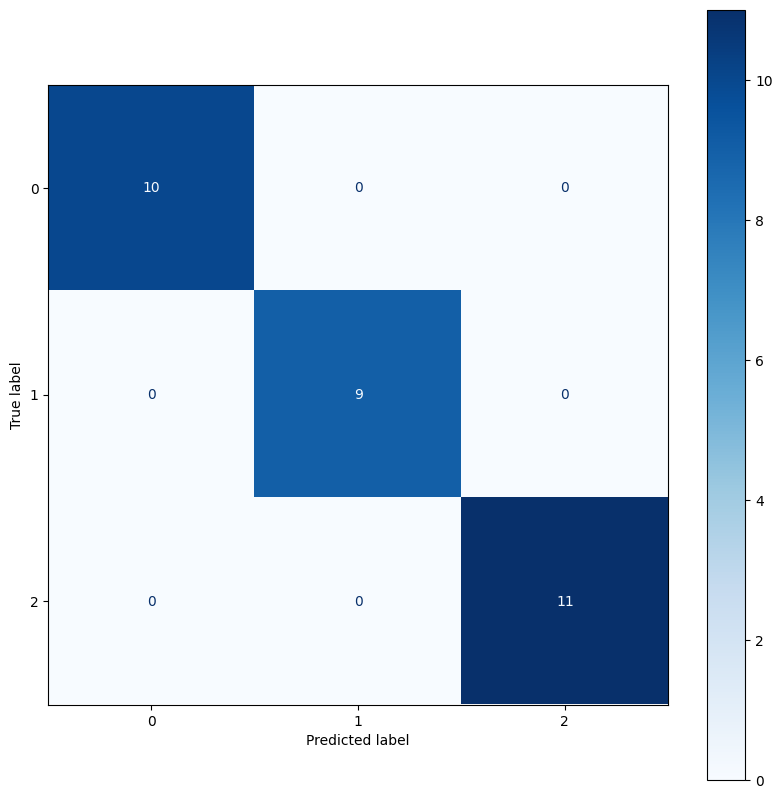

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## SVM

SVM (Support Vector Machine) es un algoritmo de clasificación que busca encontrar el mejor límite de decisión entre diferentes clases en un conjunto de datos. Busca maximizar el margen entre las clases y puede manejar datos no linealmente separables utilizando funciones kernel para transformarlos a un espacio donde sí lo sean.

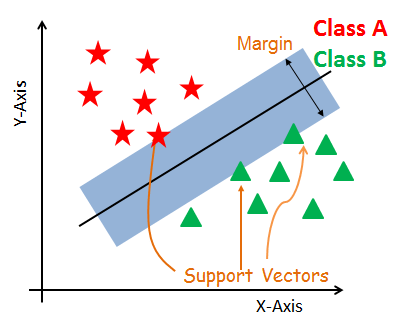

Algunos parametros para ajustar el comportamiento de este tipo de modelos:

* **C: Es el parámetro de regularización**

  Supongamos que estás utilizando SVM para clasificar las flores del conjunto de datos Iris en tres especies diferentes: setosa, versicolor y virginica. Al ajustar el parámetro de regularización C, si eliges un **valor alto de C**, el modelo SVM se ajustará muy de cerca a los datos de entrenamiento, intentando clasificar cada flor correctamente en su especie correspondiente. Esto puede llevar a un ***modelo que sea muy específico para los datos de entrenamiento*** y no generalice bien con nuevas flores. Por otro lado, si seleccionas un **valor bajo de C**, el modelo permitirá más errores en la clasificación de las flores de entrenamiento, lo que podría resultar en un ***modelo más generalizado*** que funcione mejor con nuevas flores.



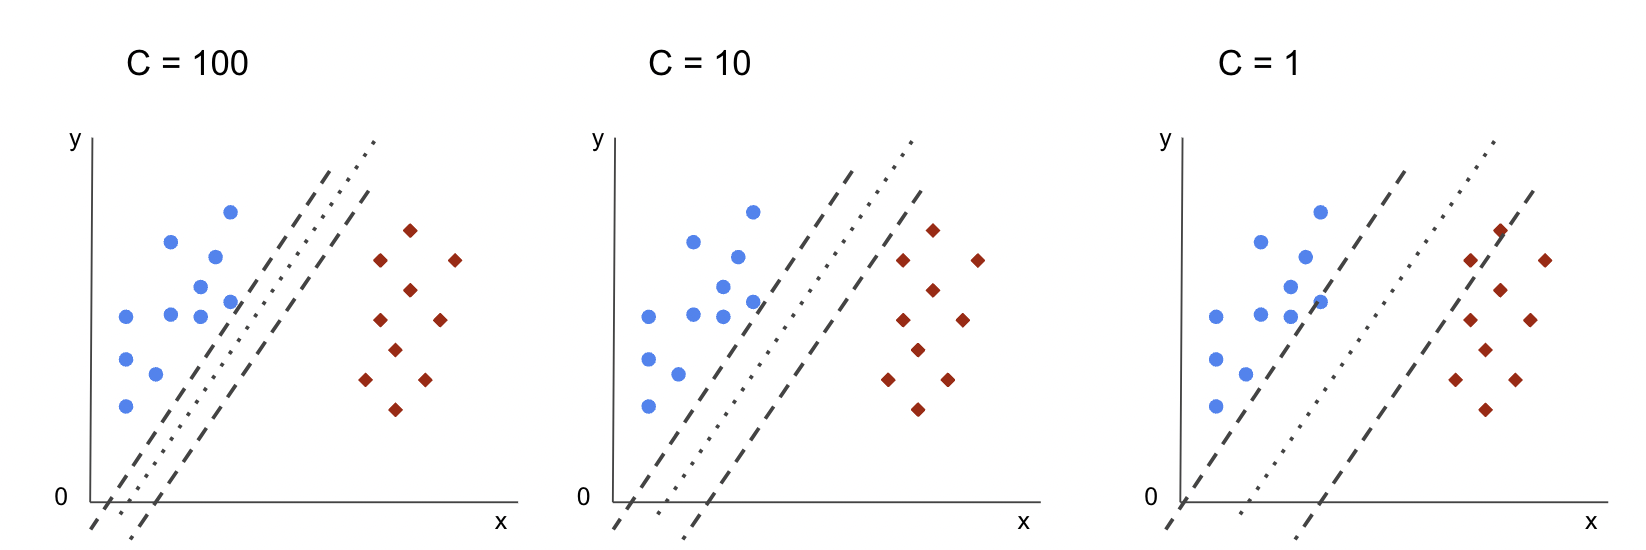

* **Gamma: controla la influencia de cada ejemplo de entrenamiento en la definición del límite de decisión**

  Un **valor alto** de gamma significa que los **puntos cercanos** tienen un peso muy alto en la definición de la frontera de decisión, mientras que un **valor bajo** de gamma significa que incluso los **puntos lejanos** tienen cierta influencia en la definición de la frontera de decisión.

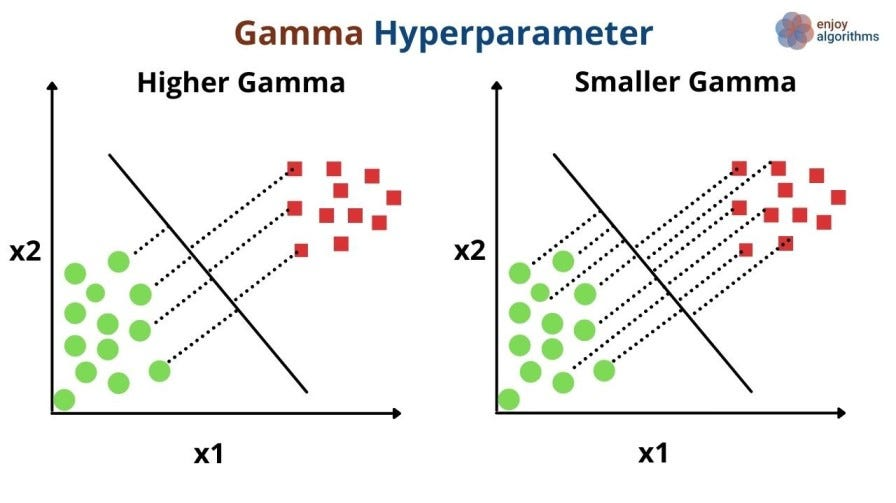

Cuando Gamma es alto (grafico a la derecha), el límite de decisión será muy ajustado a los puntos de entrenamiento, resultando en un límite de decisión más irregular y con más curvas.

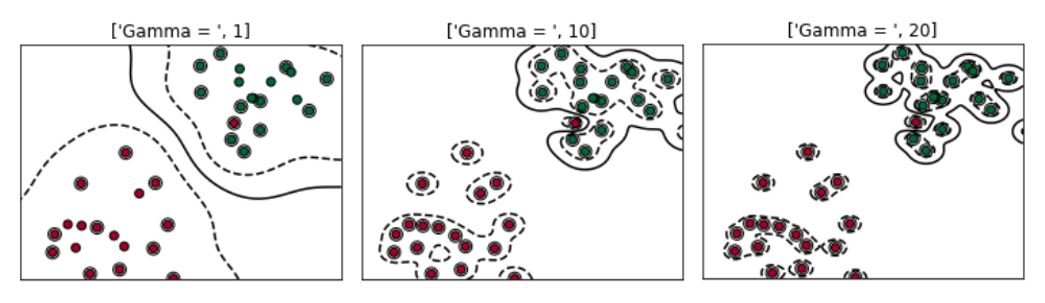

* **Kernel:  función matemática que permite transformar datos en un espacio de características de mayor dimensión**


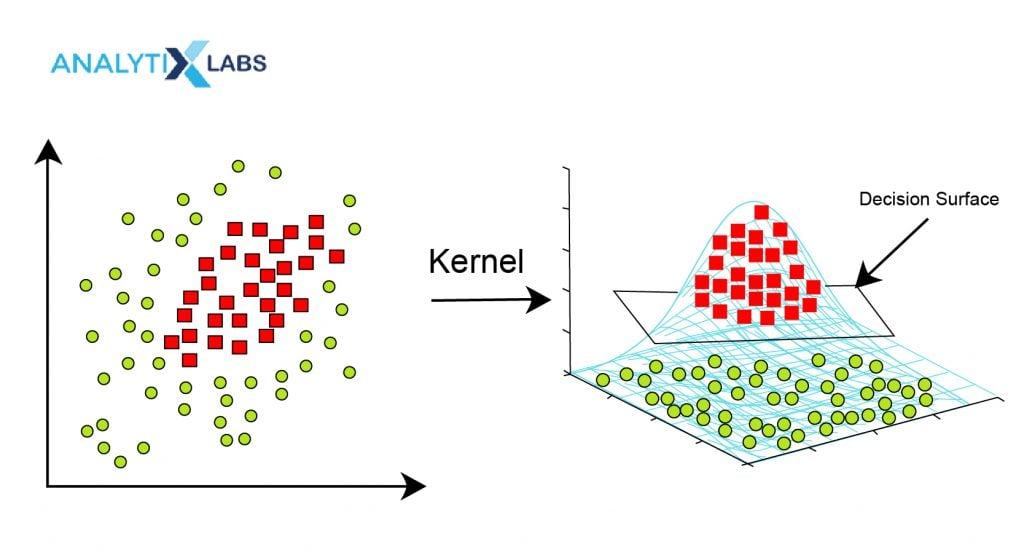

  Algunas opciones comunes a utilizar en SVM incluyen:
  * "linear": Usa un kernel lineal para clasificación lineal.
  * "rbf" (Radial Basis Function): Usa un kernel gaussiano para mapear los datos a un espacio dimensionalmente superior.
  * "poly": Usa un kernel polinomial para mapear los datos a un espacio polinómico de mayor dimensión.

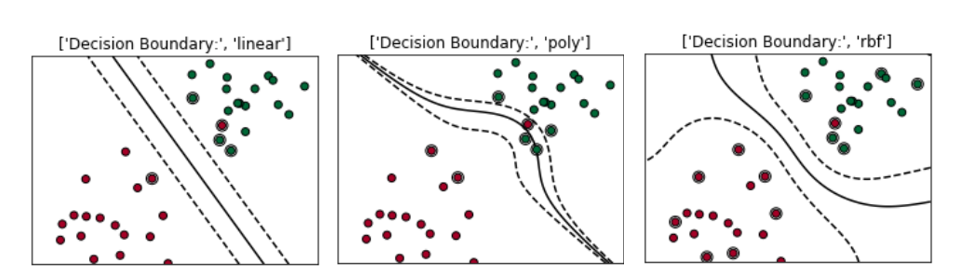

Documentacion SVC: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
from sklearn.svm import SVC

# Define los parámetros que deseas probar en la búsqueda en cuadrícula
param_grid = {'C': [0.1, 1, 10, 100],  #regularizacion, entre mas alto da complejo y mas bajo sera mas simple
              'gamma': [1, 0.1, 0.01, 0.001], #influencia de un punto de entrenamiento
              'kernel': ['rbf', 'linear', 'poly']} #tipo de función kernel

# Crea un clasificador SVM
svm = SVC()

# Crea un objeto GridSearchCV (ajuste de hiperparametros)
grid2 = GridSearchCV(svm,
                     param_grid,
                     scoring='accuracy' #la metrica de desempeño
                     )

# Ajusta el modelo al conjunto de entrenamiento
grid2.fit(X_train, y_train)
print("Best parameters:", grid2.best_params_)

Best parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}


In [ ]:
grid2.best_score_ #mejor desempeño para combinacion anterior

0.9583333333333334

In [ ]:
sklearn.metrics.get_scorer_names() #si quieres cambiar la metrica de desempeño

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
svm = SVC(C= 0.1,
          gamma= 0.1,
          kernel='poly') #ajustando los hiperparametros anteriores

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))